## Data Class Builders
身為一名資深 Python 研究員與產品開發工程師，我很樂意為您詳細闡述 Python 中資料類別建構器（Data Class Builders）的各種類型。這些工具的出現，大幅簡化了僅作為資料容器的類別（Data Class）的宣告與實作，有效地減少了繁瑣的樣板程式碼，提升了程式碼的可讀性與維護性。

在 Python 標準函式庫中，主要有三種類別建構器，它們各自有其設計理念與適用情境：

1.  **`collections.namedtuple`**
2.  **`typing.NamedTuple`**
3.  **`@dataclasses.dataclass` 裝飾器**

接下來，我將針對這三種類別建構器進行深入說明，不含任何程式碼範例。

---

### 1. `collections.namedtuple`

`collections.namedtuple` 是最早出現的資料類別建構器，自 Python 2.6 起便已提供。它並不是一個類別，而是一個**工廠函式 (factory function)**，會動態地建立一個繼承自 `tuple` 的子類別。

**主要特性與設計理念：**

*   **輕量且高效能：** `namedtuple` 建立的實例在記憶體佔用上與普通 `tuple` 完全相同，因為欄位名稱本身是儲存在類別層級，而不是每個實例都帶一份。這對於需要處理大量輕量級資料物件的場景（例如解析 CSV 或資料庫記錄）非常有用。
*   **不可變性 (Immutability)：** 由於 `namedtuple` 的實例本質上是 `tuple` 的子類別，因此它們天生就是不可變的。這意味著一旦實例被建立，其欄位值就不能被修改。不可變物件的好處是它們在多執行緒環境中更安全，且可以用作字典的鍵 (key) 或集合的元素 (element)，因為它們是可雜湊 (hashable) 的。
*   **具名欄位存取：** 儘管是 `tuple`，`namedtuple` 允許您透過直觀的欄位名稱來存取資料，例如 `obj.field_name`，而不僅僅是索引（如 `obj`）。這極大地提升了程式碼的可讀性，消除了記憶索引位置的負擔。
*   **自動生成常用方法：** `namedtuple` 會自動生成有用的 `__repr__` 方法，使得物件的字串表示更具可讀性，看起來就像是呼叫建構函式一樣。此外，它還繼承了 `tuple` 的 `__eq__` 及其他比較運算子，支援實例之間的相等性比較和排序。
*   **實用工具方法：** 每個 `namedtuple` 類別都會提供幾個便捷的類別與實例方法，例如：
    *   `_fields`：一個包含所有欄位名稱的元組。
    *   `_make(iterable)`：從可迭代物件中建立新的 `namedtuple` 實例。
    *   `_asdict()`：將 `namedtuple` 實例轉換為一個字典，其中包含欄位名稱和對應的值。這在資料序列化（例如轉為 JSON）時非常方便。
*   **傳統語法限制：** `collections.namedtuple` 的缺點是它不支援使用標準的 `class` 關鍵字語法來定義類別。這表示您無法在類別定義中直接添加自訂方法或文件字串，需要透過其他方式（例如在類別建立後動態添加）來擴展其功能，這相對來說比較不直觀。

---

### 2. `typing.NamedTuple`

`typing.NamedTuple` 是 Python 3.5 引入的，並在 Python 3.6 後支援更現代的 `class` 語法。它旨在為 `collections.namedtuple` 提供型別提示支援，使其能與靜態型別檢查工具 (如 Mypy) 更好地整合。

**主要特性與設計理念：**

*   **型別提示支援：** 這是 `typing.NamedTuple` 最核心的特點。它允許您在定義欄位時明確指定其預期的型別，這對於大型專案的程式碼品質和可維護性至關重要。型別提示有助於在程式執行前發現潛在的型別錯誤。
*   **標準類別語法：** 相較於 `collections.namedtuple` 的工廠函式呼叫方式，`typing.NamedTuple` 支援使用標準的 `class` 關鍵字來定義資料類別。這使得類別定義更加清晰，並且可以直接在類別體內定義額外的方法、屬性或文件字串，提高了程式碼的組織性與可讀性。
*   **不可變性：** 和 `collections.namedtuple` 一樣，`typing.NamedTuple` 建立的實例也是不可變的，因為它本質上仍然是一個 `tuple` 的子類別。這保留了 `namedtuple` 在函式式程式設計和安全性方面的優勢。
*   **底層實現機制：** 儘管在語法上看起來像是繼承，但 `typing.NamedTuple` 實際上是透過元類別 (metaclass) 的進階功能來實現類別的自訂創建。這使得它能夠在不直接繼承 `typing.NamedTuple` 類別本身的情況下，將其轉換為 `tuple` 的子類別，並注入所需的方法。
*   **型別提示的運行時行為：** 需要注意的是，Python 在運行時通常會忽略型別提示。`typing.NamedTuple` 利用這些提示來構建其內部結構，例如填充 `__annotations__` 屬性，但並不會在運行時強制執行型別檢查。靜態型別檢查仍需仰賴外部工具。
*   **功能與 `collections.namedtuple` 相似：** 它提供與 `collections.namedtuple` 相似的實例方法，例如 `_asdict()`。

---

### 3. `@dataclasses.dataclass` 裝飾器

`@dataclasses.dataclass` 是 Python 3.7 引入的，作為一個類別裝飾器 (class decorator)，提供了一種更為現代且強大的方式來創建資料類別。它解決了手動編寫 `__init__`、`__repr__`、`__eq__` 等常見特殊方法（"dunder methods"）的樣板程式碼問題，讓開發者能夠專注於資料本身的定義。

**主要特性與設計理念：**

*   **減少樣板程式碼：** `@dataclass` 的核心優勢在於它會根據您在類別中定義的欄位（通常帶有型別提示），自動生成許多常用的特殊方法。這些方法包括：
    *   `__init__`：自動生成建構函式，處理欄位初始化。
    *   `__repr__`：提供清晰、可讀的物件字串表示。
    *   `__eq__`：根據所有欄位的值自動實現相等性比較。
    *   `__hash__`：如果類別是 `frozen` 的且 `eq=True`，則會自動生成可雜湊的 `__hash__` 方法。
    *   `__lt__`, `__le__`, `__gt__`, `__ge__`：如果設置 `order=True`，則會自動生成這些比較方法，支援實例之間的排序。
*   **預設可變性，支援不可變：** 預設情況下，`@dataclass` 創建的實例是**可變的 (mutable)**。這意味著在實例創建後，您可以自由修改其欄位值。但它也提供 `frozen=True` 參數，當設置為 `True` 時，類別會變得「凍結」，實例成為不可變的。嘗試修改凍結的實例欄位會觸發 `dataclasses.FrozenInstanceError` 異常。這提供了彈性，讓您可以根據需求選擇可變或不可變的行為。
*   **型別提示整合：** `@dataclass` 深度整合了 PEP 526 定義的變數註釋語法（即型別提示）。它會讀取這些型別提示來推斷欄位信息，並生成對應的方法。雖然運行時不強制型別檢查，但這些提示對於靜態型別分析工具來說是寶貴的。
*   **豐富的自訂選項：** 裝飾器本身接受多個關鍵字參數，允許細緻地控制哪些特殊方法應該被生成，以及它們的行為：
    *   `init=True` / `repr=True` / `eq=True` / `order=False`：控制是否生成對應的方法。
    *   `unsafe_hash=False`：允許強制生成雜湊方法，但需謹慎使用。
*   **欄位級別的控制：** `@dataclass` 還提供了 `dataclasses.field()` 函數，用於對單個欄位進行更精確的控制。這在處理特殊情況時非常有用，例如：
    *   `default_factory`：解決了 Python 中可變預設參數的常見陷阱。當欄位需要一個可變的預設值（如列表或字典）時，應使用 `default_factory` 提供一個無參數的函式來生成該預設值，確保每個實例都有獨立的預設值，而非共享一個可變物件。
    *   `init=False` / `repr=False` / `compare=False` / `hash=False`：控制該欄位是否參與自動生成的 `__init__`、`__repr__`、比較或雜湊方法。
    *   `metadata`：允許儲存任意的自訂元資料，供其他工具或程式邏輯使用。
*   **`__post_init__` 方法：** 如果需要在標準初始化之後進行額外處理（例如資料驗證、計算衍生欄位或執行其他設置邏輯），可以在資料類別中定義 `__post_init__` 方法。這個方法會在 `__init__` 完成所有欄位賦值後自動被呼叫。
*   **`ClassVar` 和 `InitVar`：** `@dataclass` 支援 `typing.ClassVar` 來明確宣告類別屬性（而非實例欄位），以及 `dataclasses.InitVar` 來宣告僅在 `__init__` 和 `__post_init__` 中使用的參數，這些參數不會成為實例的常規欄位。
*   **不影響繼承層次：** 作為一個類別裝飾器，`@dataclass` 的應用不會改變類別本身的繼承關係。這使得它能夠與現有的類別繼承結構良好協作，不會引入額外的複雜性。
*   **實用工具函數：** `dataclasses` 模組還提供了一些模組級別的工具函數，例如 `dataclasses.asdict(x)` 用於將資料類別實例轉換為字典，以及 `dataclasses.replace(x, **kwargs)` 用於創建一個新實例並替換部分欄位值（對於 `frozen` 的資料類別尤其有用）。

---

總結來說，這三種類別建構器各自提供了不同的權衡：

*   `collections.namedtuple` 適用於最簡單、追求極致記憶體效率且資料不可變的場景，但犧牲了標準類別語法的便利性。
*   `typing.NamedTuple` 在 `collections.namedtuple` 的基礎上引入了型別提示和標準類別語法，使得資料類別的定義更現代、更具可讀性，同時保持了不可變性。
*   `@dataclasses.dataclass` 則是最靈活、功能最全面的選項。它提供豐富的自訂選項、預設可變（但可設為不可變），並能處理更複雜的初始化邏輯，是大多數現代 Python 應用中建立資料類別的首選。

作為一名資深工程師，我會根據專案需求、資料特性（是否需要可變）、以及團隊對型別提示的採用程度來選擇最適合的建構器。理解它們的底層機制和各自的優缺點，能幫助我們寫出更「Pythonic」、更穩健的程式碼。

### 基本類別

In [ ]:
class Coordinate:
    def __init__(self, lat, lon):
        self.lat = lat
        self.lon = lon

a = Coordinate(22.11, 37.14)
b = Coordinate(22.11, 37.14)

In [4]:
# 從 Object 繼承 `__repr__` 不太有用
a

In [ ]:
# 無意義的比較，從 Object 繼承的 `__eq__`，用途比較物件 ID
a == b

False

### collections.namedtuple

In [7]:
from collections import namedtuple
Coordinate = namedtuple('Coordinate', 'lat lon')

In [8]:
issubclass(Coordinate, tuple)

True

In [ ]:
# 有意義的 __repr__
a = Coordinate(22.11, 37.14)
a

Coordinate(lat=22.11, lon=37.14)

In [10]:
# 有意義的 __eq__
a == Coordinate(22.11, 37.14)

True

### typing.NamedTuple

In [11]:
import typing
Coordinate = typing.NamedTuple('Coordinate', [('lat', float), ('lon', float)])

In [12]:
issubclass(Coordinate, tuple)

True

In [13]:
typing.get_type_hints(Coordinate)

{'lat': float, 'lon': float}

In [14]:
# NamedTuple in class
from typing import NamedTuple
class Coordinate(NamedTuple):
    lat: float
    lon: float

    def __str__(self):
        ns = 'N' if self.lat >= 0 else 'S'
        we = 'E' if self.lon >= 0 else 'W'
        return f'{abs(self.lat):.1f}°{ns}, {abs(self.lon):.1f}°{we}'

In [ ]:
a = Coordinate(lat=33.2, lon=55.3)
print(a)

# Although NamedTuple appears in the class statement as a super
# class, it’s actually not. typing.NamedTuple uses the advanced func
# tionality of a metaclass2 to customize the creation of the user’s
# class.

33.2°N, 55.3°E


### dataclass decorator

@dataclass 不依靠繼承或 metaclass。因此被修飾的類別是 object 子類別。

In [20]:
from dataclasses import dataclass

@dataclass(frozen=True)
class Coordinate:
    lat: float
    lon: float

    def __str__(self):
        ns = 'N' if self.lat >= 0 else 'S'
        we = 'E' if self.lon >= 0 else 'W'
        return f'{abs(self.lat):.1f}°{ns}, {abs(self.lon):.1f}°{we}'

In [21]:
a = Coordinate(lat=33.2, lon=55.3)
print(a)


33.2°N, 55.3°E


In [22]:
issubclass(Coordinate, object)

True


collections.namedtuple、typing.NamedTuple 和 @dataclasses.dataclass 這三種 Python 中常用來建構「資料類別 (data classes)」的方式。它們的共通目標都是為了減少撰寫如 __init__、__repr__、__eq__ 等重複性代碼（boilerplate code），讓您更專注於資料本身的結構與行為。


| 特性 / 類型               | `collections.namedtuple`     | `typing.NamedTuple`             | `@dataclasses.dataclass`                  |
| :------------------------ | :--------------------------- | :------------------------------ | :---------------------------------------- |
| **Python 版本**         | 2.6+                         | 3.5+ (類別語法 3.6+)          | 3.7+                                    |
| **定義方式**            | 工廠函數 (`namedtuple(...)`)   | 工廠函數 (`NamedTuple(...)`) 或類別陳述式 (`class MyClass(NamedTuple):`) | 類別裝飾器 (`@dataclass`)             |
| **實例可變性**          | **不可變**             | **不可變**                | **預設可變**；可設 `frozen=True` 模擬不可變 |
| **基底類別**            | `tuple` 的子類別  | `tuple` 的子類別     | 預設 `object` 的子類別 (不影響繼承樹) |
| **類型提示**            | 無內建支援                     | **支援** (但運行時無強制) | **支援** (但運行時無強制)        |
| **生成 `__init__`**     | 自動生成                       | 自動生成                        | 自動生成 (可透過 `init=False` 禁用)    |
| **生成 `__repr__`**     | 自動生成                       | 自動生成                        | 自動生成 (可透過 `repr=False` 禁用)    |
| **生成 `__eq__`**       | 自動生成                       | 自動生成                        | 自動生成 (可透過 `eq=False` 禁用)      |
| **生成排序方法**        | 繼承自 `tuple` (支援比較運算子) | 繼承自 `tuple` (支援比較運算子) | 可設 `order=True` 生成 `__lt__` 等  |
| **生成 `__hash__`**     | 根據 `tuple` 的雜湊行為 (可雜湊) | 根據 `tuple` 的雜湊行為 (可雜湊) | `frozen=True` 時自動生成 (可雜湊)   |
| **記憶體使用**          | 與 `tuple` 相同 (高效) | 與 `tuple` 相同 (高效)    | 預設使用 `__dict__` (較高)；可搭配 `__slots__` 最佳化 |
| **自訂方法**            | 不易 (需 hack)          | 易於在類別陳述式中添加    | 易於在類別陳述式中添加            |
| **欄位預設值**          | 支援 `defaults` 參數 (Python 3.7+) | 支援在類別陳述式中設定    | 支援 `default` 或 `field(default_factory=...)` |
| **後初始化處理**        | 無                             | 無                              | 支援 `__post_init__` 方法             |
| **類別屬性處理**        | 普通類別屬性                     | 普通類別屬性                     | 需用 `typing.ClassVar` 區分實例與類別屬性 |
| **轉換為 `dict`**       | `._asdict()` 方法        | `._asdict()` 方法         | `dataclasses.asdict()` 函數         |

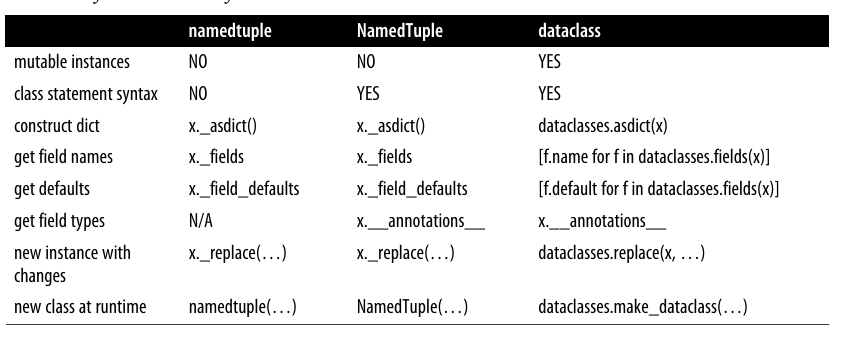

### 總結與建議
這三種資料類別建構器各自有其最適合的應用場景：

1.  **`collections.namedtuple`**：
    *   **最佳用途**：當您需要**輕量級、不可變**的資料記錄，且**不需要任何自訂方法或類型提示**時，它是最簡潔、記憶體效率最高的選擇。例如，作為從文件或簡單查詢中讀取資料的臨時結構，或在舊版 Python 環境中。
    *   **場景**：如果您正在處理大量數據，且每個數據點都是一個小而固定的記錄，並且對記憶體有嚴格要求，`namedtuple` 的效率優勢會很明顯。

2.  **`typing.NamedTuple`**：
    *   **最佳用途**：當您需要**不可變**的資料記錄，並且希望為欄位添加**明確的類型提示**以利用靜態類型檢查工具（如 Mypy）進行程式碼驗證，同時也可能需要添加**少量自訂方法**時。它提供了比 `collections.namedtuple` 更好的可讀性和維護性。
    *   **場景**：非常適合定義 API 返回的固定結構訊息，或者作為函數傳遞的不可變配置物件，強調數據結構的清晰性。

3.  **`@dataclasses.dataclass`**：
    *   **最佳用途**：當您需要**高度自訂**的資料類別，並且希望**自動生成**大部分特殊方法時。它提供了最多的靈活性，無論是實例的可變性（預設可變，可選 `frozen=True`），還是透過 `field()` 函數控制欄位的細節（如處理可變預設值、排除某些欄位出現在 `repr` 或比較中）。它讓您能更輕鬆地定義具有複雜初始化邏輯或需要 `__post_init__` 進行驗證的類別。
    *   **場景**：從簡單的資料容器到需要一定業務邏輯的領域模型，`@dataclasses.dataclass` 都是一個強大的工具。當您需要手動編寫 `__init__`、`__repr__`、`__eq__` 等方法時，它能顯著減少工作量。

**何時避免**：
儘管它們極大地簡化了資料類別的創建，但也要注意「資料類別 (Data Class)」本身可能是一種**程式碼異味 (code smell)**。如果一個資料類別僅僅是屬性的集合，沒有任何行為或邏輯，這可能表明您的設計存在問題，邏輯可能分散在其他地方。理想情況下，**資料與操作資料的行為應該緊密結合在同一個類別中**。但這不是說不能用，例如作為資料匯入/匯出的中間表示 (intermediate representation)，或者作為輕量級的資料傳輸物件 (DTO) 則是相當實用且常見的用法。

## Type Hints
這部分對於提升程式碼品質與維護性至關重要，尤其在大型專案中更是不可或缺。

首先，我們來聊聊 Type Hints 的核心概念與實務應用：

### Type Hints 核心要點

1.  **無執行期效果 (No Runtime Effect)**：
    Type Hints 最重要的一點就是它們在 Python 執行時**不會被強制執行**。Python 依然是一個動態型別語言。這表示你即使在程式碼中寫了型別提示，Python 直譯器在執行時也會將其忽略。
    例如，即使你定義一個 `Coordinate` 物件，要求 `lat` 和 `lon` 都是 `float` 型別，但你傳入 `str` 和 `None`，程式碼在執行時也不會報錯。型別提示主要是為了支援第三方型別檢查工具 (Type Checkers) 和整合開發環境 (IDEs)，例如 Mypy 或 PyCharm 內建的型別檢查器。這些工具是靜態分析工具，它們在程式碼**未運行時**檢查程式碼。

2.  **變數註釋語法 (Variable Annotation Syntax)**：
    Type Hints 的基本語法是使用冒號 (`:`) 來宣告預期的型別，例如 `var_name: some_type`。
    這語法也常用於類別中的屬性宣告，特別是在 `typing.NamedTuple` 和 `@dataclass` 的宣告中。常見的型別提示包括：
    *   具體類別，例如 `str`、`int`、`float` 或你自定義的類別 `FrenchDeck`。
    *   參數化的集合型別 (Parameterized Collection Type)，例如 `list[int]` (整數列表)、`tuple[str, float]` (包含字串和浮點數的元組) 等。
    *   `typing.Optional`，例如 `Optional[str]` 表示該欄位可以是 `str` 或 `None`。在 Python 3.10 之後，你可以使用更簡潔的 `str | None` 來表示 `Union[str, None]`。
    你也可以為變數提供預設值，例如 `var_name: some_type = a_value`。這個值將成為該屬性的預設值，如果建構函式呼叫中省略相應的參數。

3.  **變數註釋的含義 (The Meaning of Variable Annotations)**：
    Python 直譯器在模組載入（匯入時）會讀取型別提示，並將它們儲存在 `__annotations__` 字典中。
    即使是一個普通的類別，只要有型別註釋，`__annotations__` 特殊屬性也會被建立。例如，`a: int` 會讓 `'a'` 成為 `__annotations__` 中的一個鍵，但 `a` 不會自動成為類別屬性，除非它被賦予一個值。

4.  **漸進式型別系統 (Gradual Typing)**：
    Python 採用的是漸進式型別系統 (Gradual Type System)，這是一個關鍵的設計決策。這意味著：
    *   **可選性 (Optional)**：預設情況下，型別檢查器不應對沒有型別提示的程式碼發出警告。它們會假設 `Any` 型別，這與所有其他型別兼容。
    *   **不增強效能 (Does not enhance performance)**：型別註釋雖然提供了理論上可以優化的資料，但目前的 Python 執行環境並未實作這些優化。
    *   **靈活性 (Flexibility)**：你可以選擇性地為部分程式碼添加型別提示，而讓其他部分保持動態型別。追求 100% 的型別提示覆蓋率可能導致型別提示過度複雜，反而降低程式碼的可讀性，甚至限制 Python 的靈活性。在某些情況下，如果型別提示會使 API 變得不那麼好用，或者過度複雜化實作，那麼省略型別提示是完全可以接受的。

5.  **型別檢查工具 (Type Checkers)**：
    為了充分利用型別提示，你必須使用外部工具來進行靜態分析。Mypy 是最知名的型別檢查器之一。其他工具還包括 Google 的 pytype、Microsoft 的 Pyright 和 Facebook 的 Pyre。IDEs 如 PyCharm 也內建了型別檢查功能。

6.  **支援的操作定義型別 (Types Are Defined by Supported Operations)**：
    在型別提示的理論中，一個型別可以被理解為一組值和可以對這些值執行的一組函式。例如，`abc.Sequence` (抽象基底類別) 不會實作 `__mul__` 方法，因此即使程式在運行時可以對 `list` 或 `str` 執行乘法，型別檢查器也會因為 `abc.Sequence` 沒有定義 `__mul__` 而報錯。這反映了名義型別 (Nominal Typing) 和鴨子型別 (Duck Typing) 的區別，儘管 Python 本身是鴨子型別的，但靜態型別檢查需要更明確的型別定義。

7.  **常用型別註釋 (Types Usable in Annotations)**：
    除了基本型別，還有一些特殊型別和模式在 Type Hints 中非常有用：
    *   **`Any` 型別**：任何漸進式型別系統的基石。當型別檢查器無法確定型別時，它會假設為 `Any`。
    *   **`Optional` 和 `Union` 型別**：`Optional[str]` 是 `Union[str, None]` 的縮寫，表示可以是字串或 `None`。Python 3.10+ 中可以使用 `str | None` 語法。
    *   **泛型集合 (Generic Collections)**：自 Python 3.9 起，內建集合型別如 `list`、`set`、`dict` 開始支援泛型註釋，例如 `list[str]` 表示字串列表。在 Python 3.8 或更早版本，你需要從 `typing` 模組匯入 `List`、`Dict` 等型別。
    *   **元組型別 (Tuple Types)**：元組可以註釋為固定長度的記錄（`tuple[str, float, str]`）或可變長度的同質序列（`tuple[int, ...]`，表示任意數量的整數）。
    *   **抽象基底類別 (Abstract Base Classes, ABCs)**：在參數型別提示中使用 `collections.abc` 中的 ABCs，如 `collections.abc.Mapping` 而非具體的 `dict`，可以提高程式碼的靈活性，因為它允許傳入任何符合該抽象介面的物件。

8.  **程式碼風格 (Code Style)**：
    雖然型別提示的風格規則可能很瑣碎，例如冒號後跟一個空格，等號兩邊都有空格（如果包含預設值），但建議使用像 `flake8` 和 `blue` 這樣的程式碼格式化工具來自動處理這些細節。

### 額外考量

*   **型別提示的代價 (Cost of Type Hints)**：
    導入型別提示並非沒有成本。除了學習型別系統所需的初始投資外，還有持續的維護成本。過於嚴格地堅持型別檢查可能會讓你失去 Python 的一些表達能力。例如，像 `config(**settings)` 這樣強大的參數解包功能，型別檢查器難以理解。
    在某些情況下，特別是使用元程式設計 (Metaprogramming) 的函式庫，型別提示會非常困難甚至不可能。例如，`requests` 函式庫的 `files` 參數的型別提示就極為複雜。

*   **循序漸進 (Start Simple, Iterate)**：
    不要一開始就追求 100% 的型別覆蓋率。從關鍵函式或重要資料結構開始添加提示，讓型別檢查器引導你逐步完善。Mypy 等工具可以配置為只檢查有註釋的函式，或報告不完整的註釋。

*   **測試依然是王道 (Testing is Still King)**：
    儘管型別提示有助於在開發早期發現錯誤，但它們不能取代全面的自動化測試。型別提示無法捕捉所有型別錯誤，也無法檢查商業邏輯的正確性。強大的測試套件仍然是軟體品質的基石。用 Bruce Eckel 的話來說，如果 Python 程式有足夠的單元測試，它就能像 C++、Java 或 C# 程式一樣穩健。

*   **`typing.cast` 和 `Any` 的使用 (Use of `typing.cast` and `Any`)**：
    `typing.cast()` 函式用於在型別檢查器無法正確推斷型別時，向它提供額外指導。在運行時，`cast` 什麼都不做，它只是向型別檢查器發出訊號，表明返回值具有指定型別。
    然而，過度使用 `cast` 是一種程式碼異味 (Code Smell)。通常情況下，Mypy 報告的錯誤是正確的。濫用 `Any` 也可能產生連鎖反應，破壞型別檢查器偵測錯誤的能力。

*   **運行時存取型別提示 (Reading Type Hints at Runtime)**：
    Python 在匯入時會將型別提示儲存在 `__annotations__` 屬性中。然而，直接讀取 `__annotations__` 並不可靠，特別是當存在「前向引用」(Forward References) 或在 `from __future__ import annotations` 的情況下，提示會以字串形式儲存。建議使用 `typing.get_type_hints()` (或 Python 3.10+ 的 `inspect.get_annotations()`) 來可靠地解析型別提示。但要注意，Python 核心開發者仍在努力解決運行時型別提示的可靠性問題，這部分在 Python 3.10 中仍然是一個正在發展的主題。

總之，Type Hints 是 Python 語言自 2001 年型別與類別統一以來最大的變革之一。它們為大型專案提供了靜態分析的便利，有助於在程式運行前發現錯誤。但由於 Python 的動態特性，型別提示始終是**可選的**，並且在某些情況下，過度使用反而會限制其靈活性。作為資深工程師，我們應該明智地選擇何時何地使用 Type Hints，並將其視為改進程式碼品質的工具之一，而不是唯一的標準。